In [1]:
pip install pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:/Users/Chandana D/Downloads/archive (5)/Titanic-Dataset.csv")

In [5]:
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Fill numeric missing values with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill categorical missing values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [7]:
# Label Encoding for binary columns
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encoding for multiple categories
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


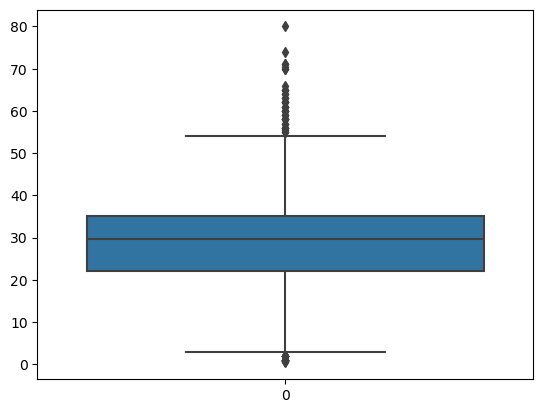

In [8]:
sns.boxplot(df['Age'])
plt.show()

# Remove outliers beyond IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Age'] >= Q1 - 1.5*IQR) & (df['Age'] <= Q3 + 1.5*IQR)]


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


In [10]:
df.to_csv('cleaned_titanic.csv', index=False)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.676034,1,0,A/5 21171,-0.485389,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.896210,1,0,PC 17599,0.797171,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.282973,0,0,STON/O2. 3101282,-0.471869,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.601414,1,0,113803,0.432967,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,0.601414,0,0,373450,-0.469366,NaN,0,1
